In [265]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Retrieve the Excel file from IBGE ftp

In [269]:
excel_2015 = "ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2015/Tabelas_de_Resultados/xlsx/02_Domicilios_Particulares_Permanentes/04_Equipamento_de_Acesso_a_Internet.xlsx"

# Create DataFrame with the *.xlsx file

In [270]:
df = pd.read_excel(excel_2015, sheet_name='Tabela 2.4.1.1. 2.4.1.2')

In [271]:
df.head()

,"Tabela 2.4.1.1 - Domicílios particulares permanentes com utilização da Internet, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet no domicílio - 2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,"Tabela 2.4.1.2 - Distribuição dos domicílios particulares permanentes com acesso à Internet, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet no domicílio - 2015",Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Equipamento utilizado para acessar a Internet ...,Domicílios particulares permanentes com utiliz...,NaN,NaN,NaN,NaN,NaN,Equipamento utilizado para acessar a Internet ...,Distribuição dos domicílios particulares perma...,NaN,NaN,NaN,NaN,NaN
2,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN
3,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
4,Total,39295,2295.68,7988.46,19452.1,6381.74,3177.04,Total,100,100,100,100,100,100


In [249]:
df = df[df.columns[0:2]]

In [250]:
df.head()

,"Tabela 2.4.1.1 - Domicílios particulares permanentes com utilização da Internet, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet no domicílio - 2015",Unnamed: 1
0,NaN,NaN
1,Equipamento utilizado para acessar a Internet ...,Domicílios particulares permanentes com utiliz...
2,NaN,Brasil
3,NaN,NaN
4,Total,39295


In [251]:
df.columns = ['Label', 'Total']

In [252]:
df

,Label,Total
0,NaN,NaN
1,Equipamento utilizado para acessar a Internet ...,Domicílios particulares permanentes com utiliz...
2,NaN,Brasil
3,NaN,NaN
4,Total,39295
5,Microcomputador,NaN
6,Utilizavam,27535.5
7,Somente microcomputador,2770.03
8,Não utilizavam,11759.6
9,Telefone móvel celular ou tablet,NaN


### Remove useless rows

In [253]:
df = df.drop(df.index[:5])
df = df.drop(df.index[-1])
df = df.drop(df.index[-1])
df

,Label,Total
5,Microcomputador,NaN
6,Utilizavam,27535.5
7,Somente microcomputador,2770.03
8,Não utilizavam,11759.6
9,Telefone móvel celular ou tablet,NaN
10,Utilizavam,36467.5
11,Somente telefone móvel celular ou tablet,11575
12,Não utilizavam,2827.53
13,Telefone móvel celular,NaN
14,Utilizavam,36194.2


### Get all gadgets names

In [254]:
gadgets = df[df.isna().Total].Label.iloc[:].values
gadgets

array(['Microcomputador ', 'Telefone móvel celular ou tablet',
       'Telefone móvel celular', 'Tablet', 'Televisão ',
       'Outro equipamento'], dtype=object)

### Get a List with all 'somente *' values

In [255]:
df = df.dropna()
values_2015 = df[df.Label.str.contains('Somente')].Total.iloc[:].values
values_2015

array([2770.027, 11574.971, 10608.433, 93.105], dtype=object)

# Define a funtion to execute all previous DF steps

In [256]:
def extract_data(excel):
    df = pd.read_excel(excel, sheet_name='Tabela 2.4.1.1. 2.4.1.2')
    
    df = df[df.columns[0:2]]
    df.columns = ['Label', 'Total']
        
    df = df.dropna()
    return df[df.Label.str.contains('Somente')].Total.iloc[:].values
    

In [272]:
excel_2014 = 'ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2014/Tabelas_de_Resultados/xlsx/02_Domicilios_Particulares_Permanentes/04_Equipamento_de_Acesso_a_Internet.xlsx'
values_2014 = extract_data(excel_2014)

In [276]:
excel_2013 = 'ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2013/tabelas_xls/02domicilios/04equipamento.xls'
values_2013 = extract_data(excel_2013)

In [ ]:
# values_2011 = extract_data('test.xlsx')

In [ ]:
# values_2008 = extract_data('test.xlsx')

# Build new DataFrame with all years

In [283]:
dic = {
    'Gadget': gadgets[:4],
    '2015': values_2015, 
    '2014': values_2014, 
    '2013': values_2013, 
#     '2011': values_2011, 
#     '2008': values_2008
}

In [284]:
df_years = pd.DataFrame(dic)
df_years.head()

,2013,2014,2015,Gadget
0,13248.4,6402.41,2770.03,Microcomputador
1,3584.44,8514.59,11575,Telefone móvel celular ou tablet
2,3274.72,7731.94,10608.4,Telefone móvel celular
3,138.997,178.645,93.105,Tablet


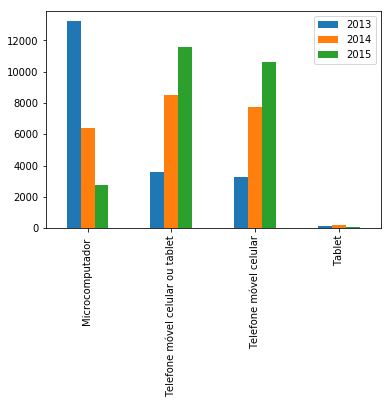

In [285]:
df_years.plot.bar(x=df_years.Gadget.iloc[:].values)